Steepest Decent 和 Newton's Method是两个优化算法

* Line Search Algorithm的基本思想是，对于某个函数，在某一点x_k重，如果提督f'(x_k) != 0，则可以构造一条射线x_k + ap_k，然后在这条射线上寻找合适的步长a，使得函数值下降

关注:
* Decent Direction 梯度下降方向
* Step Length Selection 步长选择

Wolfe Condition: 一种Step Length Selection策略，包含2个条件：
* Sufficient Decrease Condition, Armijo Condition
    * 要求函数值的下降幅度至少和步长线性相关
* Curvature Condition
    * 只有Sufficient Decrease Condition可能导致步长过小，影响优化速度。

Different Curvature Conditions:
* Strong Curvature Condition -> Strong Wolfe Condition
* Curvature Condition -> Wolfe Condition


Backtracking Linesearch
* directly apply sufficient decrease condition, no checking curvature condition
* Step Direction Selection Algoeirhms:
    * First-order Taylor Expansion -> Steepest Decent
    * Second-order Taylor Expansion -> Newton's Method

Steepest Decent's limitation:
* 当一阶线性模型没有下界的时候，p随着梯度递减，无法求得最优步长方向；此时直接取最速下降的方向


Newton's Method's limitation:
* Hessian is not positive definite





Testing function: f1
Steepest Descent | Iterations: 10, Rho: 0.9, Final x: [9.81063234 3.89458492], Time: 0.04402 sec
Newton Method | Iterations: 10, Rho: 0.9, Final x: [0.28247525 0.28247525], Time: 0.00113 sec
Steepest Descent | Iterations: 10, Rho: 0.5, Final x: [9.8063952  6.18726348], Time: 0.00658 sec
Newton Method | Iterations: 10, Rho: 0.5, Final x: [0.28247525 0.28247525], Time: 0.00118 sec
Steepest Descent | Iterations: 10, Rho: 0.3, Final x: [9.85515288e+00 4.06120376e-03], Time: 0.00388 sec
Newton Method | Iterations: 10, Rho: 0.3, Final x: [0.28247525 0.28247525], Time: 0.00110 sec
Steepest Descent | Iterations: 10, Rho: 0.1, Final x: [9.98001799 1.07374182], Time: 0.00279 sec
Newton Method | Iterations: 10, Rho: 0.1, Final x: [0.28247525 0.28247525], Time: 0.00128 sec


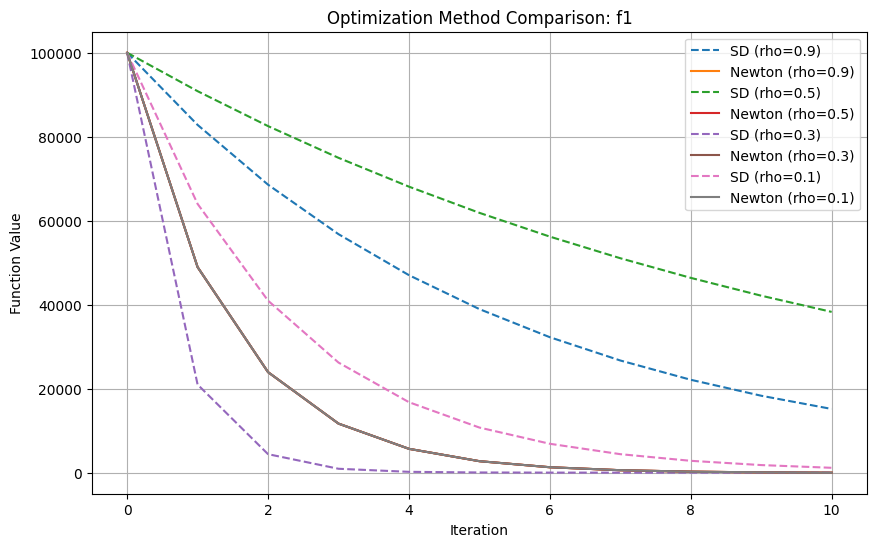

Testing function: f2
Steepest Descent | Iterations: 10, Rho: 0.9, Final x: [1.44785509 2.02225547], Time: 0.00805 sec
Newton Method | Iterations: 10, Rho: 0.9, Final x: [-0.79855028  0.61047764], Time: 0.00054 sec
Steepest Descent | Iterations: 10, Rho: 0.5, Final x: [-1.01781085  1.03713659], Time: 0.00158 sec
Newton Method | Iterations: 10, Rho: 0.5, Final x: [-0.79855028  0.61047764], Time: 0.00101 sec
Steepest Descent | Iterations: 10, Rho: 0.3, Final x: [-1.0195126   1.04227576], Time: 0.00092 sec
Newton Method | Iterations: 10, Rho: 0.3, Final x: [-0.79855028  0.61047764], Time: 0.00044 sec
Steepest Descent | Iterations: 10, Rho: 0.1, Final x: [-0.84492637  0.72282178], Time: 0.00065 sec
Newton Method | Iterations: 10, Rho: 0.1, Final x: [-0.79855028  0.61047764], Time: 0.00050 sec


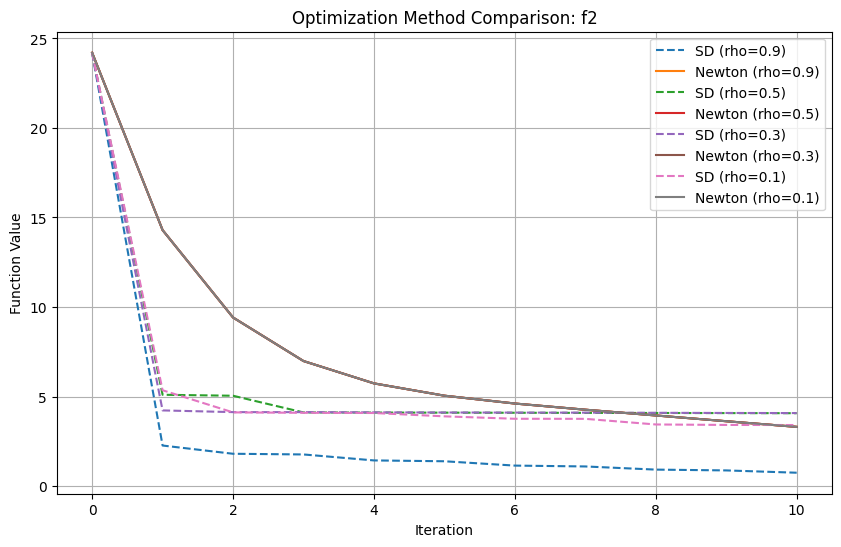

Testing function: f3
Steepest Descent | Iterations: 10, Rho: 0.9, Final x: [0.98105873 0.38039081], Time: 0.01147 sec
Newton Method | Iterations: 10, Rho: 0.9, Final x: [1. 1.], Time: 0.24950 sec
Steepest Descent | Iterations: 10, Rho: 0.5, Final x: [0.98133485 0.00250211], Time: 0.00598 sec
Newton Method | Iterations: 10, Rho: 0.5, Final x: [1. 1.], Time: 0.03276 sec
Steepest Descent | Iterations: 10, Rho: 0.3, Final x: [ 9.83030790e-01 -6.30795769e-04], Time: 0.00363 sec
Newton Method | Iterations: 10, Rho: 0.3, Final x: [1. 1.], Time: 0.01935 sec
Steepest Descent | Iterations: 10, Rho: 0.1, Final x: [0.99037766 0.00350076], Time: 0.00227 sec
Newton Method | Iterations: 10, Rho: 0.1, Final x: [1. 1.], Time: 0.01084 sec


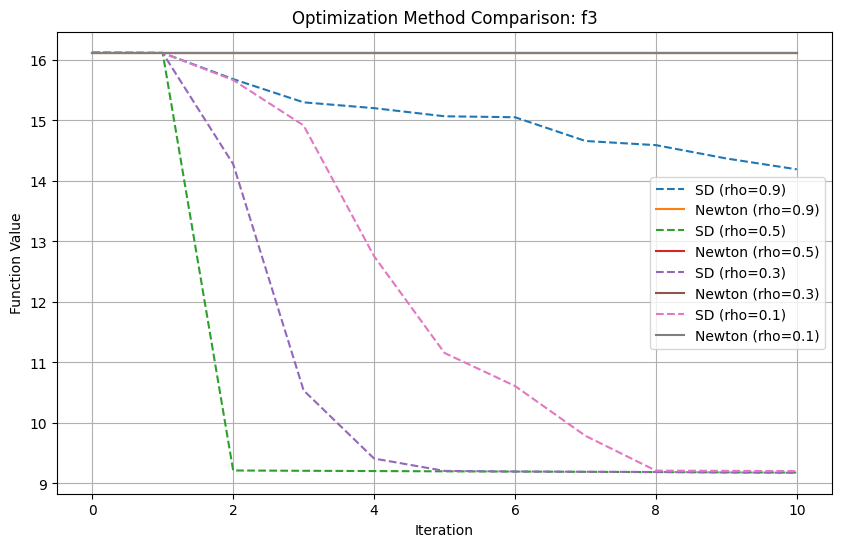

Testing function: f4
Steepest Descent | Iterations: 10, Rho: 0.9, Final x: [-0.01414119 -0.14952464], Time: 0.02201 sec
Newton Method | Iterations: 10, Rho: 0.9, Final x: [ 0.05649505 -0.05649505], Time: 0.00271 sec
Steepest Descent | Iterations: 9, Rho: 0.5, Final x: [0.00190938 0.00190938], Time: 0.00381 sec
Newton Method | Iterations: 10, Rho: 0.5, Final x: [ 0.05649505 -0.05649505], Time: 0.00293 sec
Steepest Descent | Iterations: 10, Rho: 0.3, Final x: [0.00320022 0.00231638], Time: 0.00289 sec
Newton Method | Iterations: 10, Rho: 0.3, Final x: [ 0.05649505 -0.05649505], Time: 0.00279 sec
Steepest Descent | Iterations: 10, Rho: 0.1, Final x: [0.26306675 0.26843546], Time: 0.00415 sec
Newton Method | Iterations: 10, Rho: 0.1, Final x: [ 0.05649505 -0.05649505], Time: 0.00295 sec


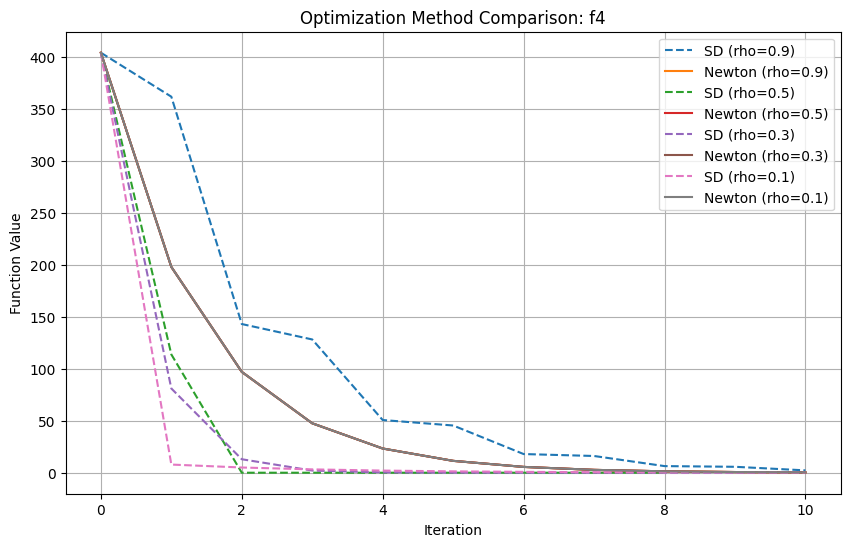

Testing function: f5
Steepest Descent | Iterations: 10, Rho: 0.9, Final x: [-2.53948729e-05  5.96379060e-01], Time: 0.01121 sec
Newton Method | Iterations: 10, Rho: 0.9, Final x: [-0.04237129  0.52301766], Time: 0.00245 sec
Steepest Descent | Iterations: 10, Rho: 0.5, Final x: [ 0.         -0.09781309], Time: 0.00194 sec
Newton Method | Iterations: 10, Rho: 0.5, Final x: [-0.04237129  0.52301766], Time: 0.00184 sec
Steepest Descent | Iterations: 10, Rho: 0.3, Final x: [0.1968     0.10722604], Time: 0.00173 sec
Newton Method | Iterations: 10, Rho: 0.3, Final x: [-0.04237129  0.52301766], Time: 0.00186 sec
Steepest Descent | Iterations: 10, Rho: 0.1, Final x: [0.3145728  0.11461291], Time: 0.00208 sec
Newton Method | Iterations: 10, Rho: 0.1, Final x: [-0.04237129  0.52301766], Time: 0.00183 sec


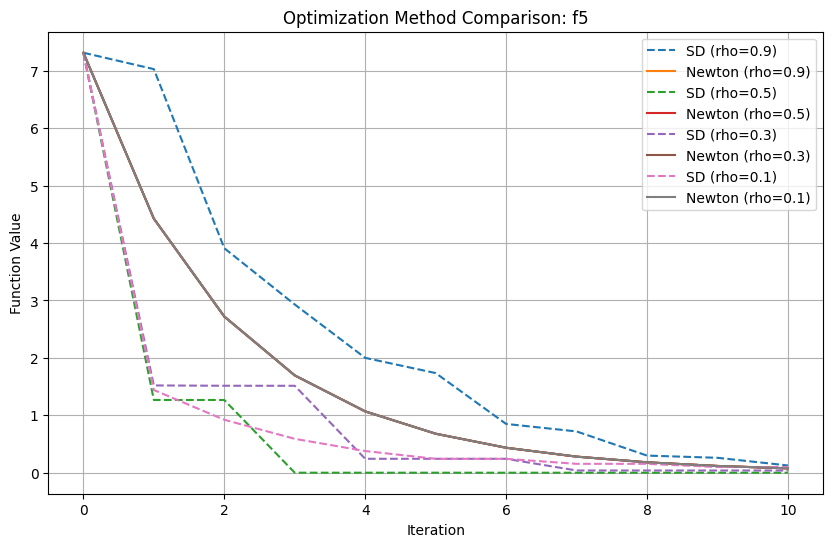

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import time
from case_studies import *

def backtracking_line_search(f, grad_f, x, p, alpha=1.0, rho=0.5, c1=1e-4):
    while f(x + alpha * p) > f(x) + c1 * alpha * np.dot(grad_f(x), p):
        alpha *= rho
    return alpha

def steepest_descent(f, grad_f, x0, rho, tol=1e-6, max_iter=10):
    x = x0
    history = [f(x)]
    start_time = time.time()
    for iteration in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        p = -grad
        alpha = backtracking_line_search(f, grad_f, x, p, rho=rho)
        x = x + alpha * p
        history.append(f(x))
    end_time = time.time()
    
    print(f"Steepest Descent | Iterations: {iteration+1}, Rho: {rho}, Final x: {x}, Time: {end_time - start_time:.5f} sec")
    return history

def newton_method(f, grad_f, hessian_f, x0, rho, tol=1e-6, max_iter=10):
    x = x0
    history = [f(x)]
    start_time = time.time()
    for iteration in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        hess = hessian_f(x)
        try:
            p = -np.linalg.solve(hess, grad)
        except np.linalg.LinAlgError:
            p = -grad
        alpha = backtracking_line_search(f, grad_f, x, p, rho=rho)
        x = x + alpha * p
        history.append(f(x))
    end_time = time.time()
    
    print(f"Newton Method | Iterations: {iteration+1}, Rho: {rho}, Final x: {x}, Time: {end_time - start_time:.5f} sec")
    return history

def banchmark_protocol(functions, x0s, rho_values):
    i=0
    for f, df, Hf, name in functions:
        plt.figure(figsize=(10, 6))
        print(f"Testing function: {name}")
        for rho in rho_values:
            history_sd = steepest_descent(f, df, x0s[i], rho)
            plt.plot(range(len(history_sd)), history_sd, label=f"SD (rho={rho})", linestyle='--')
            
            history_newton = newton_method(f, df, Hf, x0s[i], rho)
            plt.plot(range(len(history_newton)), history_newton, label=f"Newton (rho={rho})")
        
        plt.xlabel("Iteration")
        plt.ylabel("Function Value")
        plt.title(f"Optimization Method Comparison: {name}")
        plt.legend()
        plt.grid()
        plt.show()
        i+=1

# Define test functions
functions = [
    (f1, df1, Hf1, "f1"),
    (f2, df2, Hf2, "f2"),
    (f3, df3, Hf3, "f3"),
    (f4, df4, Hf4, "f4"),
    (f5, df5, Hf5, "f5")
]

x0s = [
    np.array([10, 10]),
    np.array([-1.2, 1.0]),
    np.array([1, 1]),
    np.array([2, -2]),
    np.array([-1.5, 1.5])
]

# x0 = np.array([-1.0, 1.0])
rho_values = [0.9, 0.5, 0.3, 0.1]

banchmark_protocol(functions, x0s, rho_values)